# Multilayer Perceptron

## 1. Exploración y preprocesamiento de datos:

Cargamos los datos

Observando que los delimitadores están conformados por "\" hemos especificado el parametro "delimiter"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds_path = "data/data.csv"
df = pd.read_csv(ds_path)


Visualizamos la cabecera

In [2]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


Exploramos los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observamos los valores unicos de las variables categóricas

In [4]:
from utils.eda import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

diagnosis
['M' 'B']


Continuamos con la exploración de los datos

Visualizamos las últimas entradas

In [5]:
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


Verificamos los valores descriptivos

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Continuamos con el analisis

In [7]:
df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


### Identificación de valores nulos, duplicados y outliers

In [8]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No se observan valores duplicados

Ahora buscamos valores nulos

In [9]:
from utils.eda import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
Unnamed: 32,0,569,100.0
compactness_se,569,0,0.0
fractal_dimension_worst,569,0,0.0
symmetry_worst,569,0,0.0
concave points_worst,569,0,0.0
concavity_worst,569,0,0.0
compactness_worst,569,0,0.0
smoothness_worst,569,0,0.0
area_worst,569,0,0.0
perimeter_worst,569,0,0.0


Se observa una columna compuesta enteramente por valores duplicados. Procederemos a eliminarla

In [10]:
#drop column
df = df.drop('Unnamed: 32', axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Verificamos duplicados en columna id

In [12]:
df['id'].duplicated().sum()

0

No existen duplicados, por lo tanto podemos eliminarlo ya que el mismo no tiene informacion importante para el modelo

In [13]:
df = df.drop('id', axis=1)

Verificamos duplicados luego de haber elimado la columna id

In [14]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


Generamos un grafico con la distribucion de casos positivos y negativos

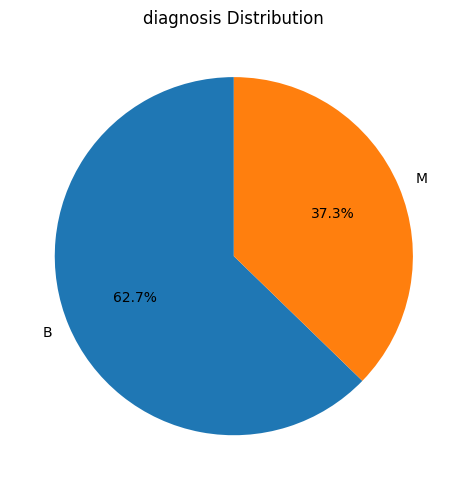

In [15]:
from utils.eda import graph_pie
column_names=["diagnosis",]
graph_pie(df, column_names, figsize=(5,5), num_columns=1)

Convertimos a booleano, Benigno = False, Maligno = True

In [16]:
def _convertir_diganosis(x):
    return x == 'M'



df["diagnosis"] = df["diagnosis"].apply(_convertir_diganosis).astype("boolean")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    boolean
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Generamos Histogramas para visualizar la distribucion

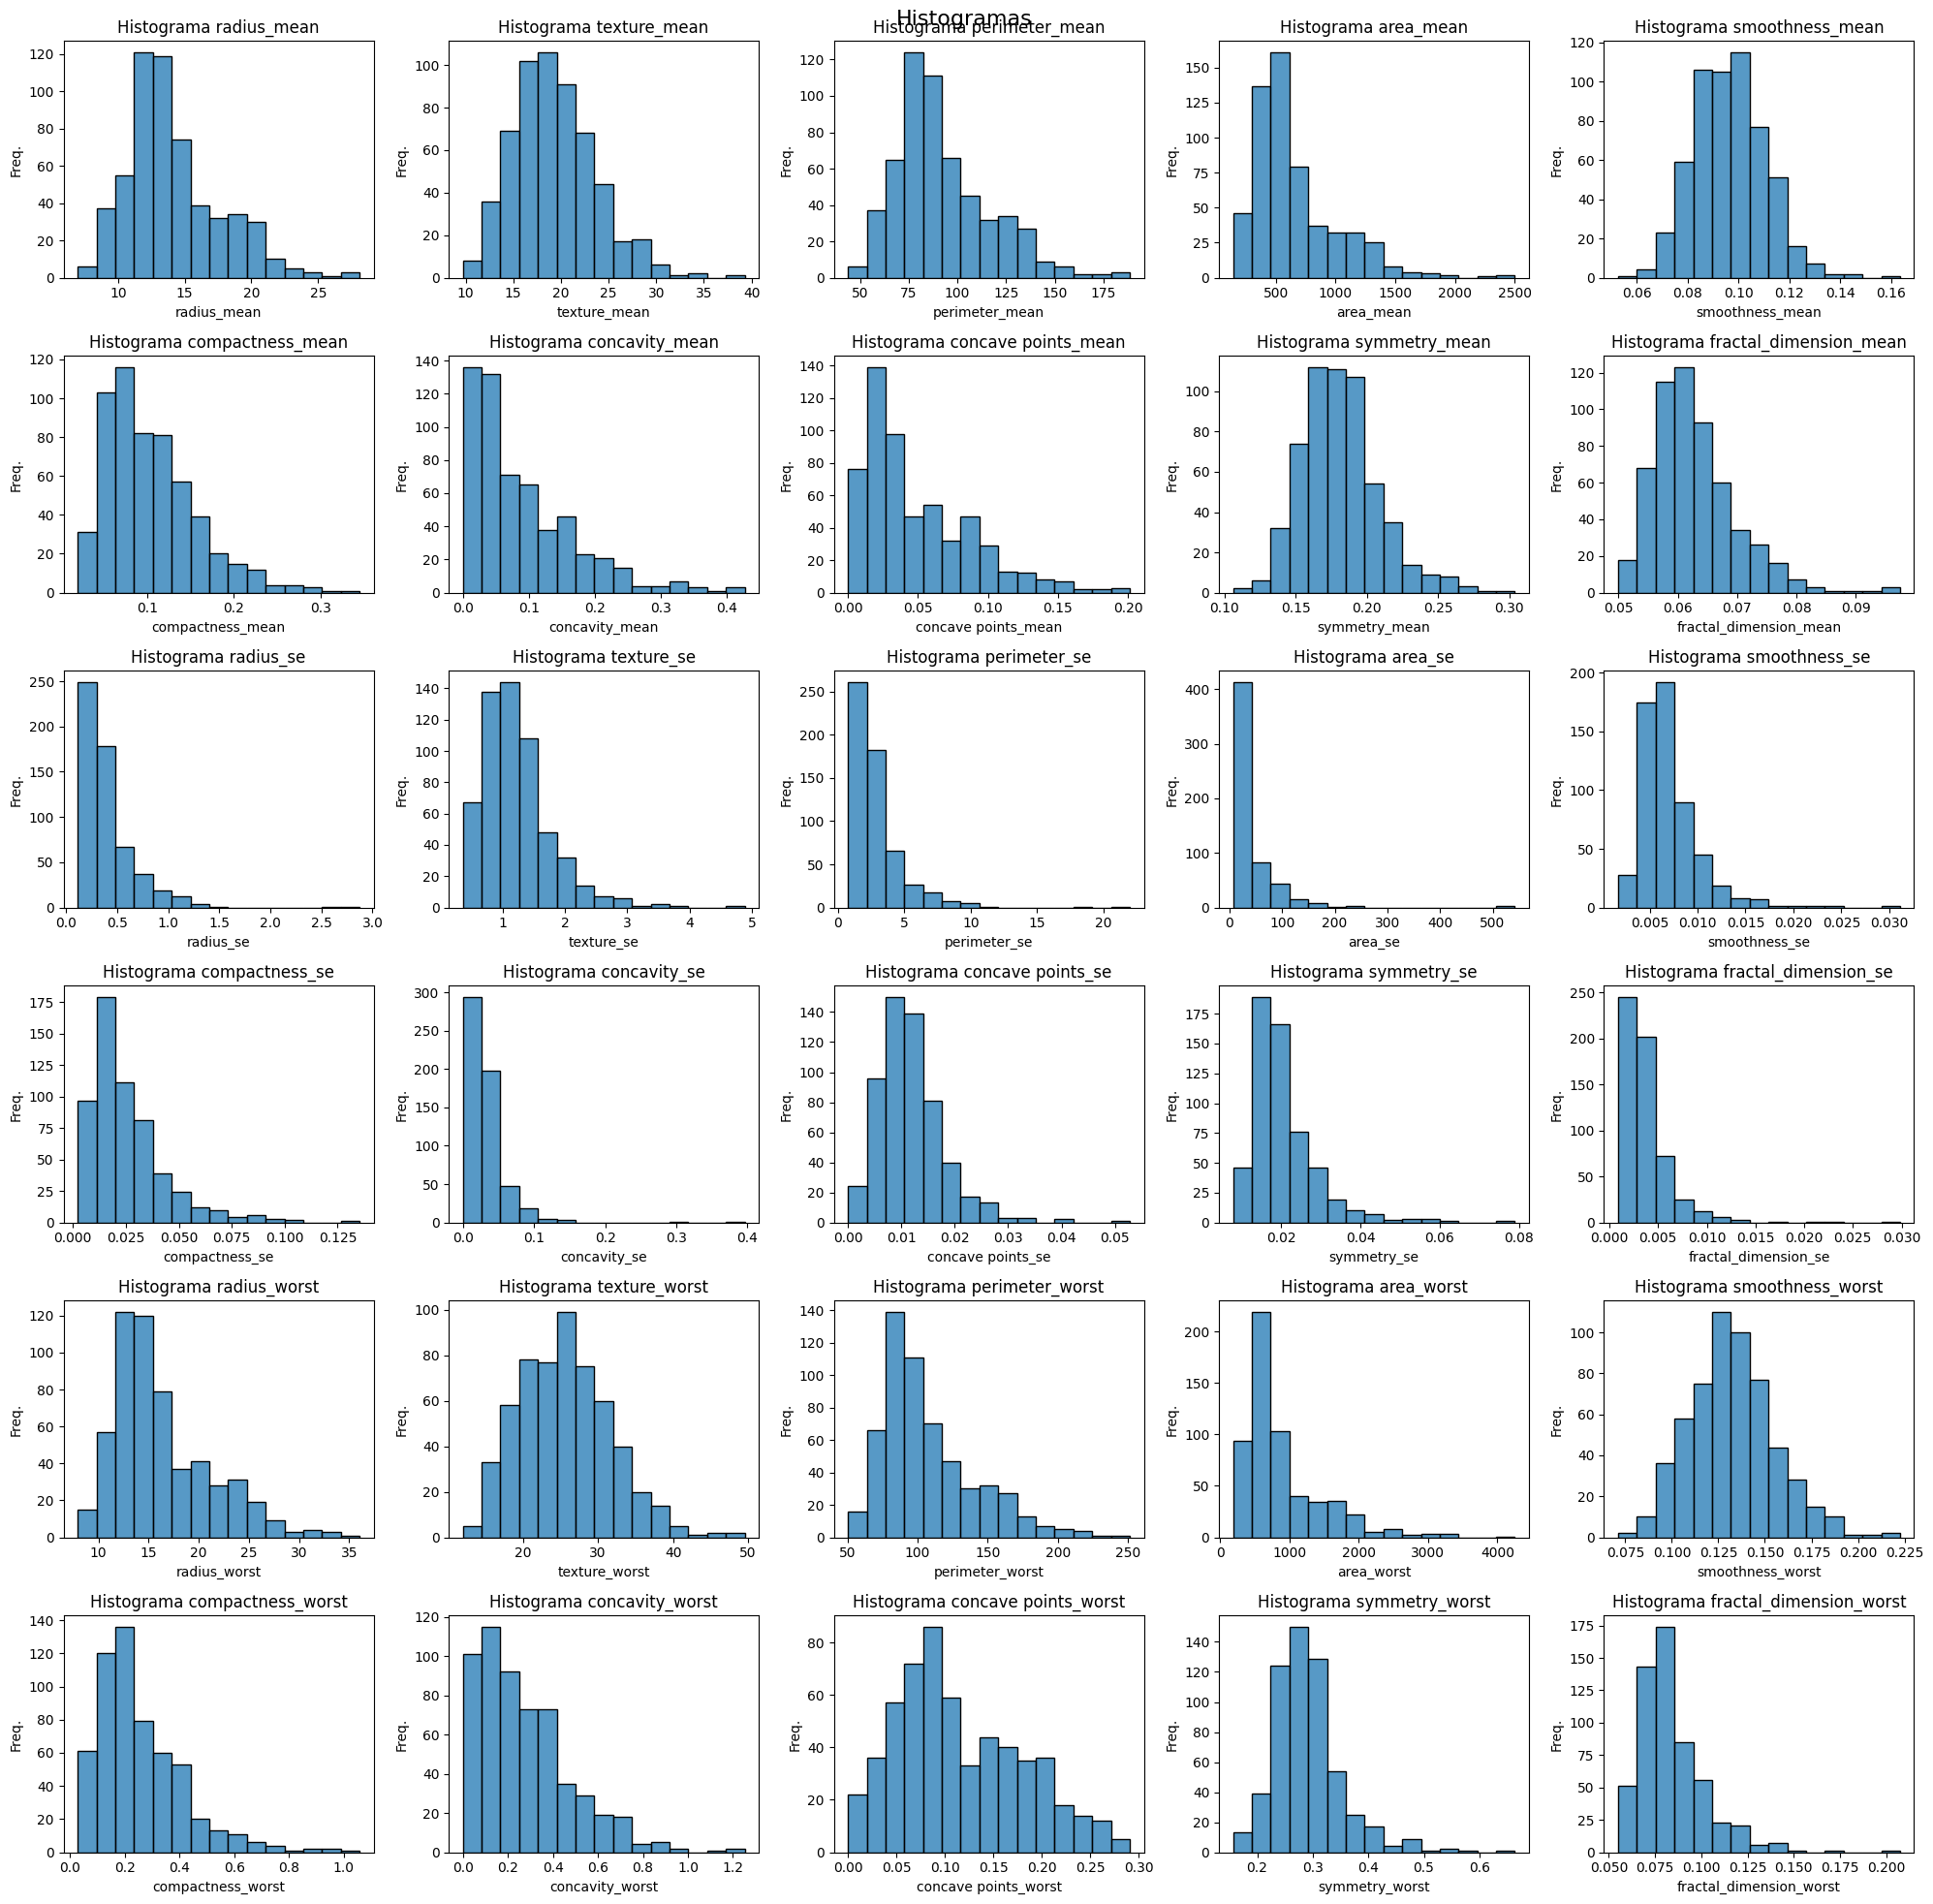

In [18]:
from utils.eda import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), bins=15, columns_number=5, figsize=(20, 20))

No se observa nada fuera de lo normal en los histogramas, algunos muestran un desplazamiento a la izquierda

Ahora verificamos los outliers

In [19]:
from utils.eda import get_outliers_data
get_outliers_data(df)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
N° Outliers,14.000000,7.000000,13.00000,25.000000,6.000000,16.000000,18.000000,10.000000,15.000000,15.000000,...,17.000000,5.000000,15.000000,35.000000,7.000000,16.000000,12.000000,0.000000,23.000000,24.000000
% Outliers,2.460457,1.230228,2.28471,4.393673,1.054482,2.811951,3.163445,1.757469,2.636204,2.636204,...,2.987698,0.878735,2.636204,6.151142,1.230228,2.811951,2.108963,0.000000,4.042179,4.217926
Lim. mix,5.580000,7.725000,31.77500,-123.300000,0.057975,-0.033300,-0.122150,-0.060225,0.111200,0.045070,...,4.340000,8.120000,22.175000,-337.750000,0.072500,-0.140650,-0.288100,-0.079775,0.149150,0.040530
Lim. max,21.900000,30.245000,147.49500,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,0.078750,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.306105,0.419150,0.123010


Visualizamos las gráficas de cajas de nuestras columnas

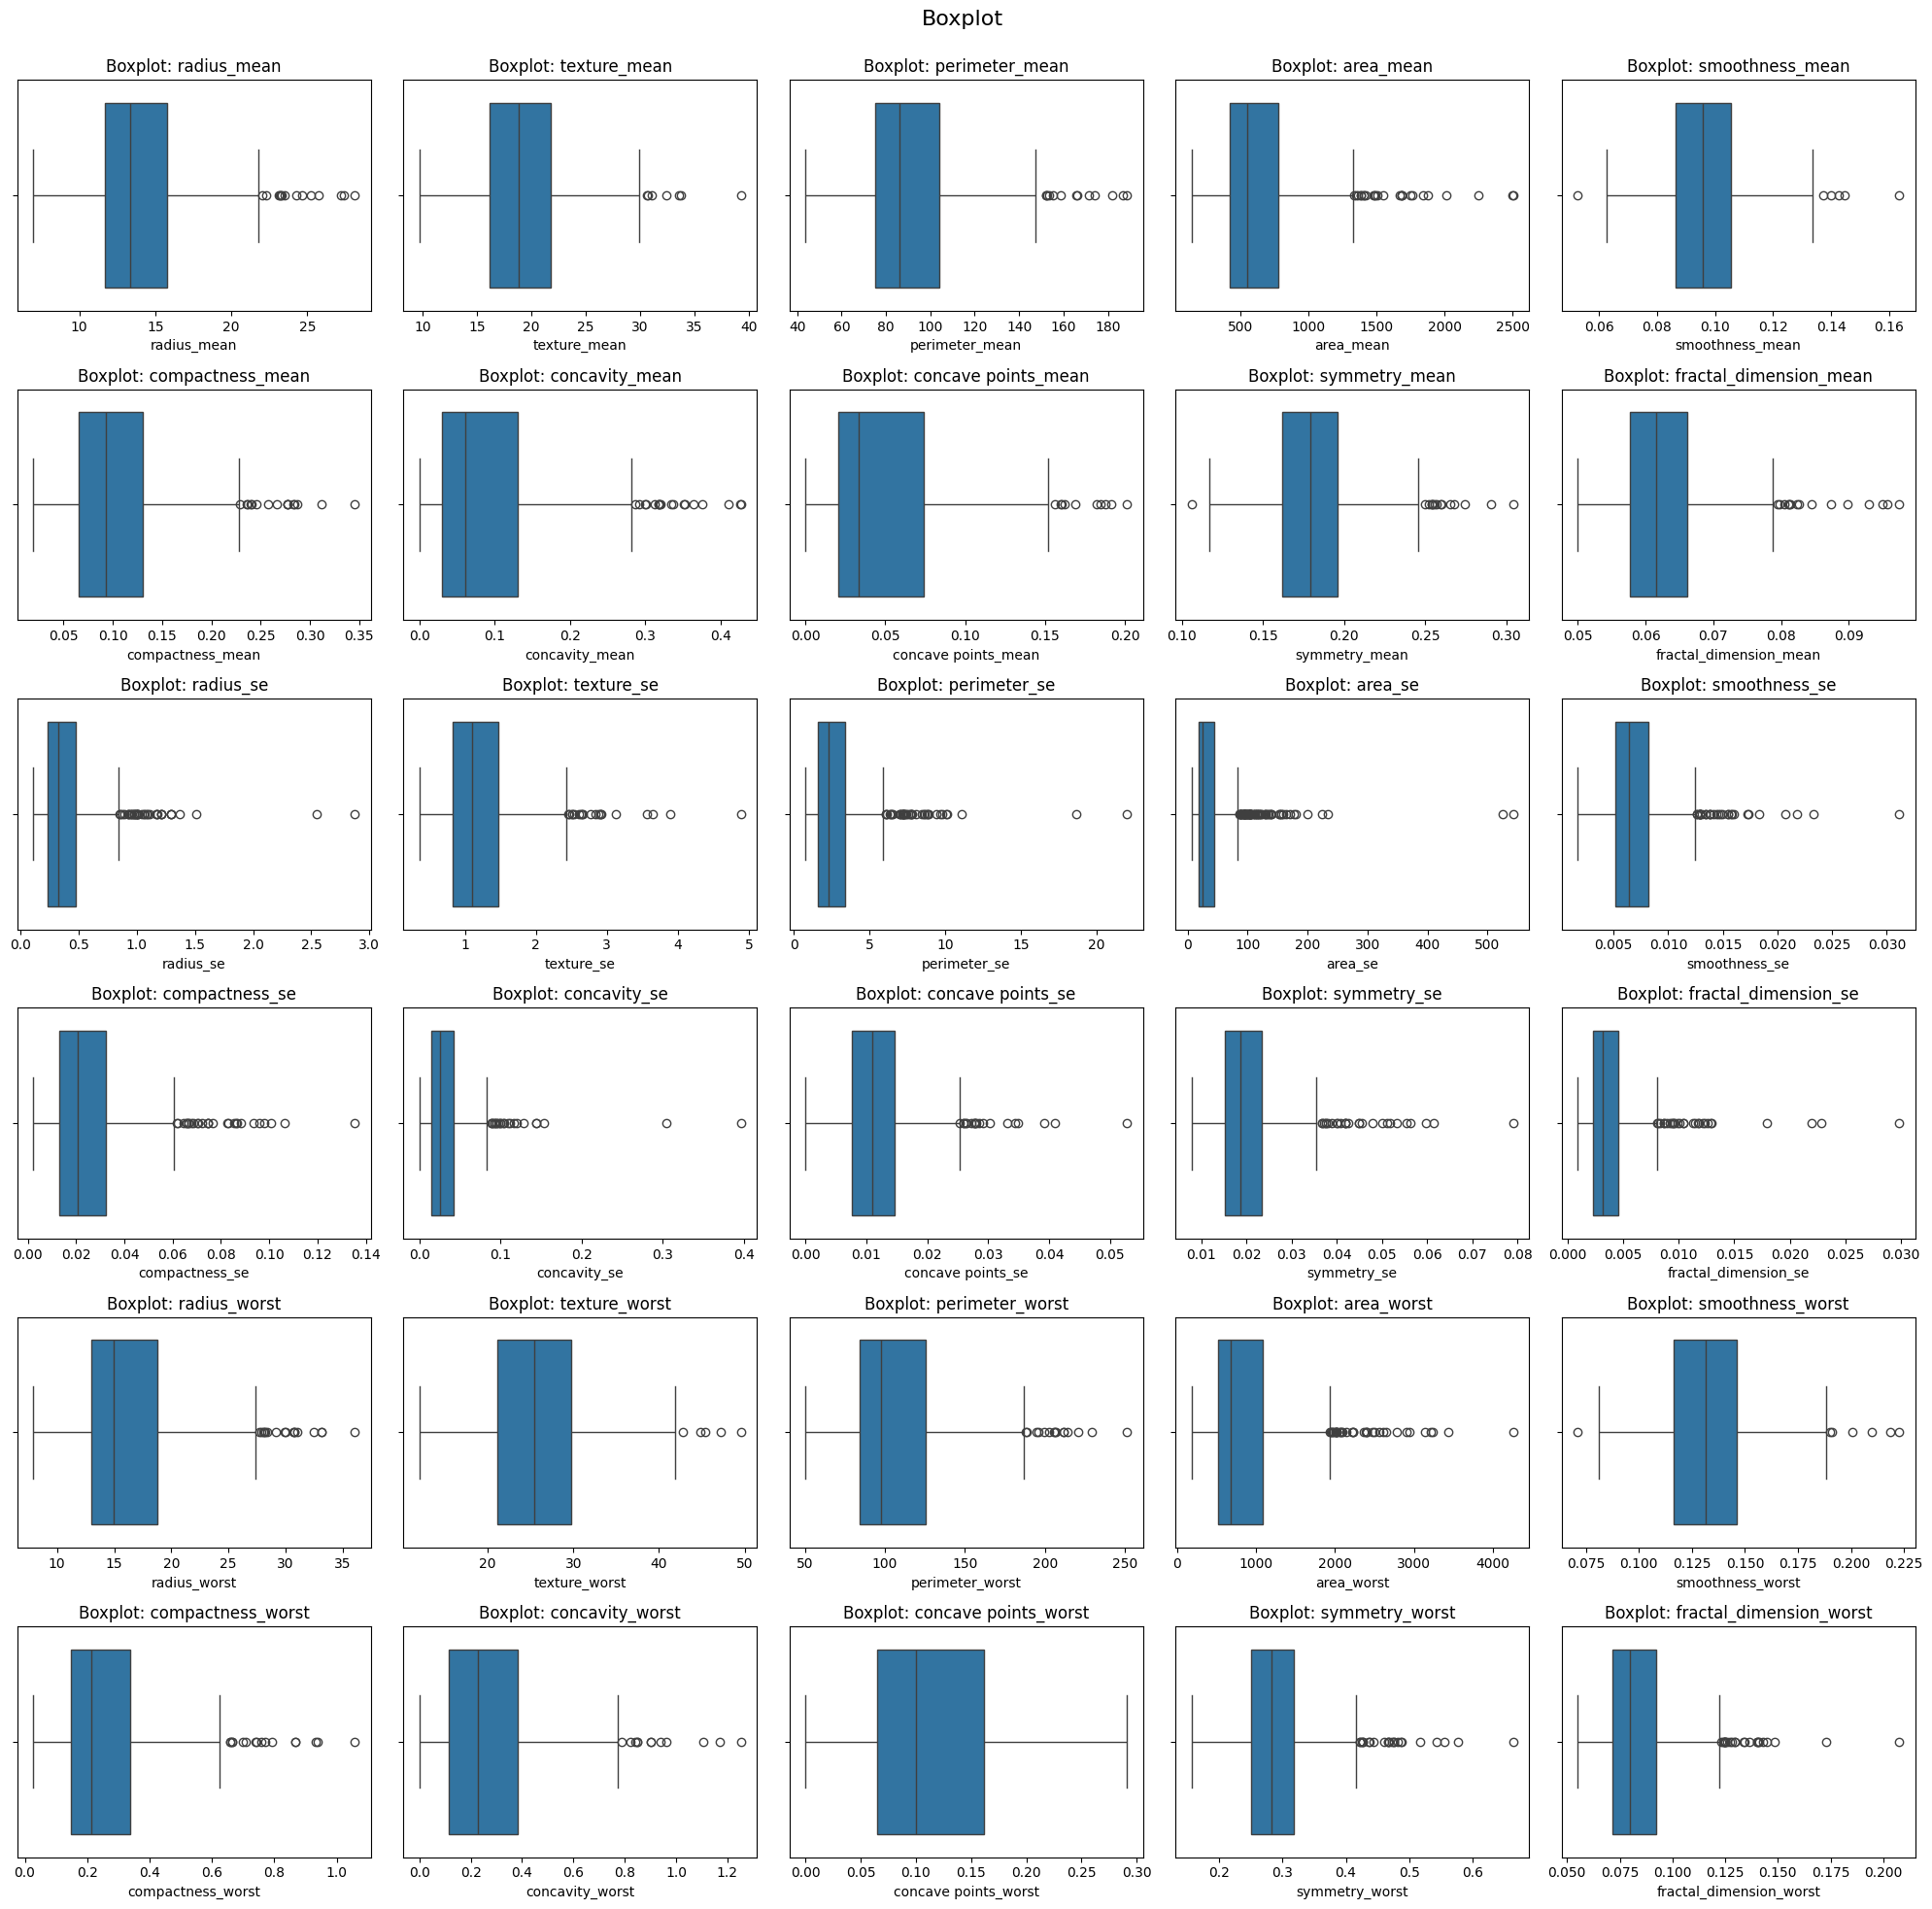

In [20]:
from utils.eda import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df), figsize=(20, 20), num_columns=5)

Observamos varios outliers por lo tanto es mejor aplicar RobustScaler

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [21]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
from utils.eda import get_descriptive_statistics
get_descriptive_statistics(df)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
median,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
variation_coefficient,0.249450,0.222971,0.264208,0.537364,0.145954,0.506155,0.897753,0.793204,0.151325,0.112430,...,0.297079,0.239366,0.313278,0.646568,0.172491,0.618789,0.766470,0.573549,0.213281,0.215154


Veremos las correlaciones entre las caracteristicas

In [23]:
from utils.eda import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Ahora graficamos el mapa de calor de las correlaciones

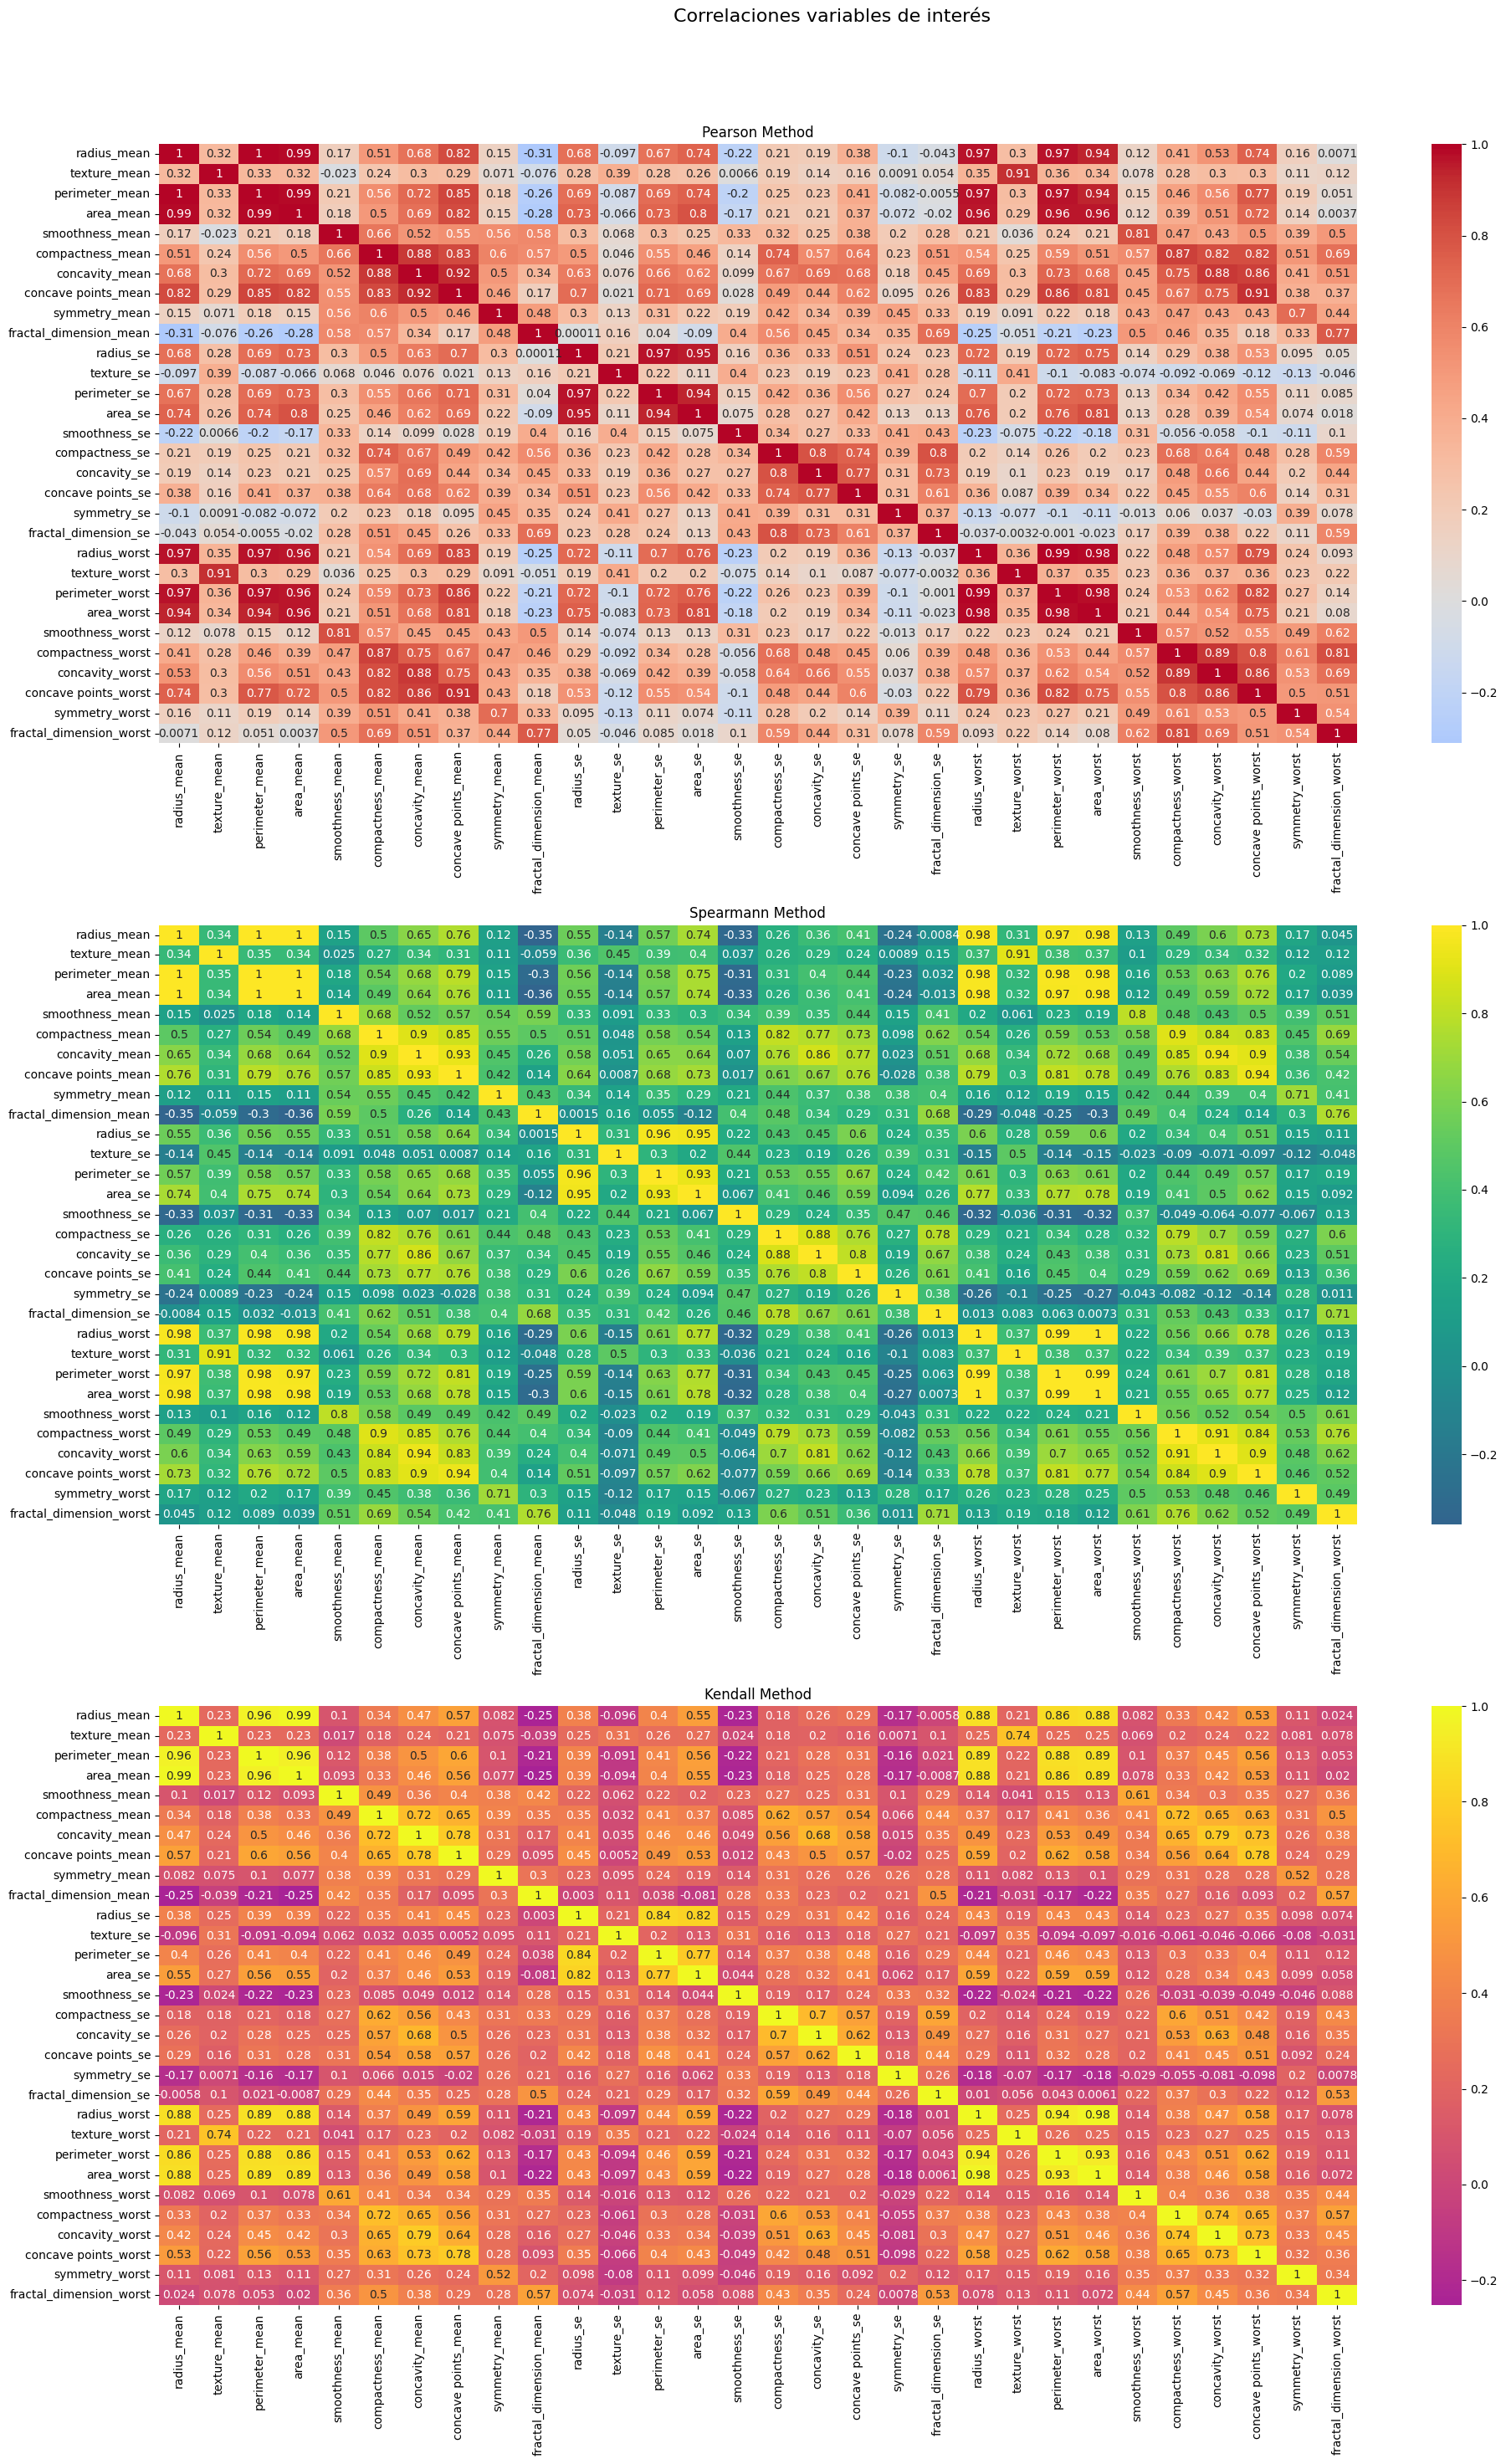

In [24]:
from utils.eda import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,30))

Vemos que existen muchas correlaciones importantes

### Preparamos los datos para el entrenamiento

In [25]:
numeric_columns = get_numeric_columns
X = df[numeric_columns]
y = df["diagnosis"].apply(lambda x: 1.0 if x else 0.0)

In [26]:
import matplotlib.pyplot as plt
from utils.eda import graph_confusion_matrixes
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

Separamos en set de entrenamiento 80% y test 20%

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

Aplicamos RobustScaler

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Observamos el tamanho de nuestro sed de entrenamiento

In [29]:
X_train.shape

(455, 30)

Seteamos los valores de las capas de nuestra red neuronal

In [30]:
model = Sequential([
    Input(shape=(30,)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,129 (31.75 KB)

 Trainable params: 8,129 (31.75 KB)

 Non-trainable params: 0 (0.00 B)

Entrenamos nuestro modelo

In [31]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_split=0.2)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6293 - loss: 0.5874 - val_accuracy: 0.9560 - val_loss: 0.2134
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9560 - loss: 0.1543 - val_accuracy: 0.9560 - val_loss: 0.1333
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.1075 - val_accuracy: 0.9560 - val_loss: 0.1212
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9556 - loss: 0.0922 - val_accuracy: 0.9670 - val_loss: 0.1129
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0323 - val_accuracy: 0.9670 - val_loss: 0.1096
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.0565 - val_accuracy: 0.9670 - val_loss: 0.1050
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0446 - val_accuracy: 0.9670 - val_loss: 0.0977
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0424 - val_accuracy: 0.9560 - v

Visualizamos las curvas de aprendizaje

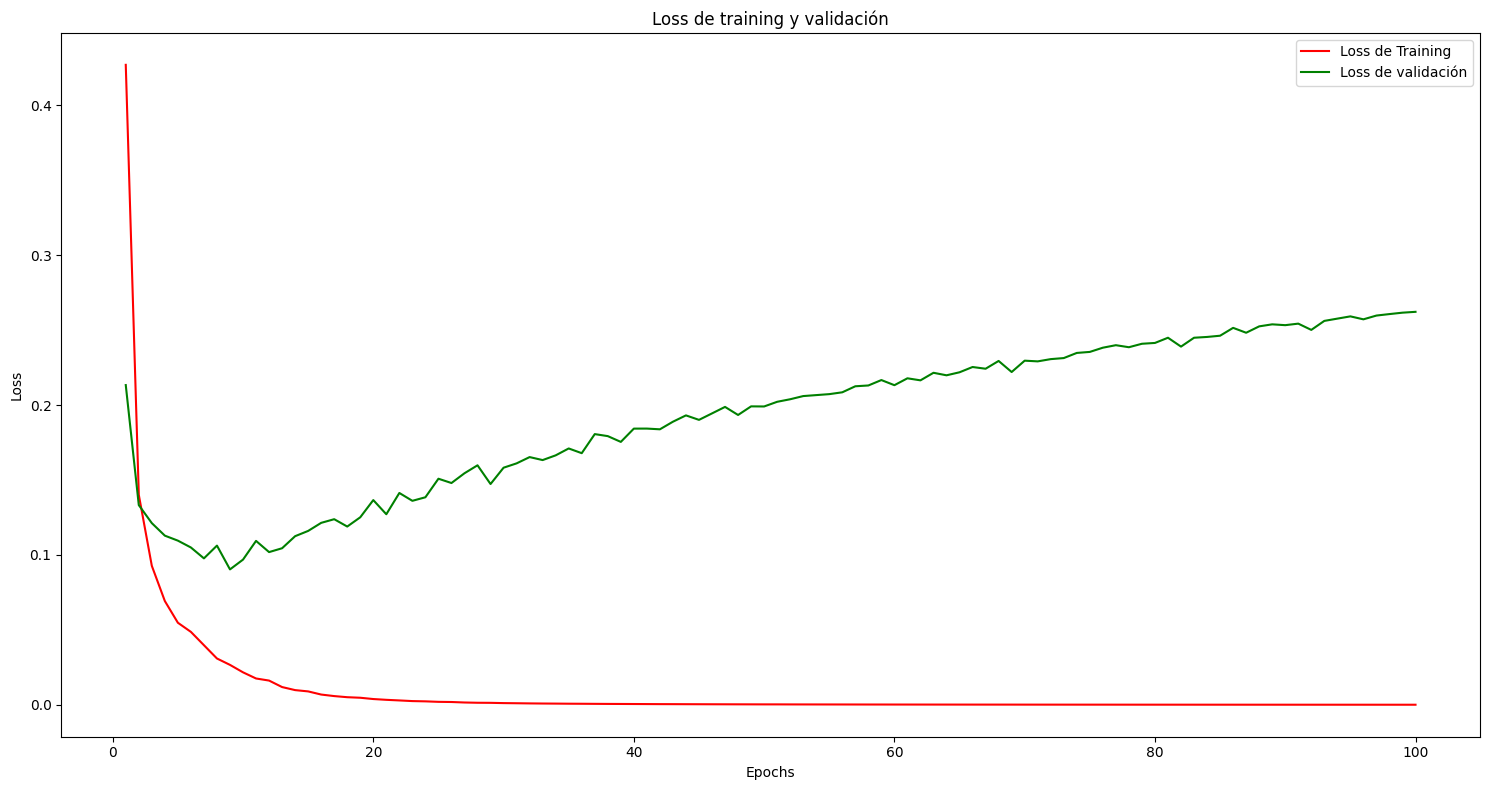

In [32]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

epochs = [i+1 for i in range(len(tr_loss))]
plt.figure(figsize= (15, 8))

plt.plot(epochs, tr_loss, 'r', label= 'Loss de Training')
plt.plot(epochs, val_loss, 'g', label= 'Loss de validación')
plt.title('Loss de training y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Evaluamos nuestro modelo

In [33]:
y_pred_nn = model.predict(X_test_scaled)


y_pred_nn_binarized = [1 if y > 0.95 else 0 for y in y_pred_nn]


accuracy_nn = accuracy_score(y_test, y_pred_nn_binarized)
precision_nn = precision_score(y_test, y_pred_nn_binarized)
recall_nn = recall_score(y_test, y_pred_nn_binarized)
f1_nn = f1_score(y_test, y_pred_nn_binarized)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn)


print(f"Accuracy Neural Network: {accuracy_nn}")
print(f"Precision Neural Network: {precision_nn}")
print(f"Recall Neural Network: {recall_nn}")
print(f"F1 Neural Network: {f1_nn}")
print(f"ROC AUC Neural Network: {roc_auc_nn}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy Neural Network: 0.9736842105263158
Precision Neural Network: 1.0
Recall Neural Network: 0.9302325581395349
F1 Neural Network: 0.963855421686747
ROC AUC Neural Network: 0.9931215198165738


In [34]:
classification_report_nn = classification_report(y_test, y_pred_nn_binarized)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_binarized)

print("Reporte de Clasificación Neural Network")
print(classification_report_nn)
print("Matriz de confusión Neural Network")
print(conf_matrix_nn)

Reporte de Clasificación Neural Network
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        71
         1.0       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Matriz de confusión Neural Network
[[71  0]
 [ 3 40]]


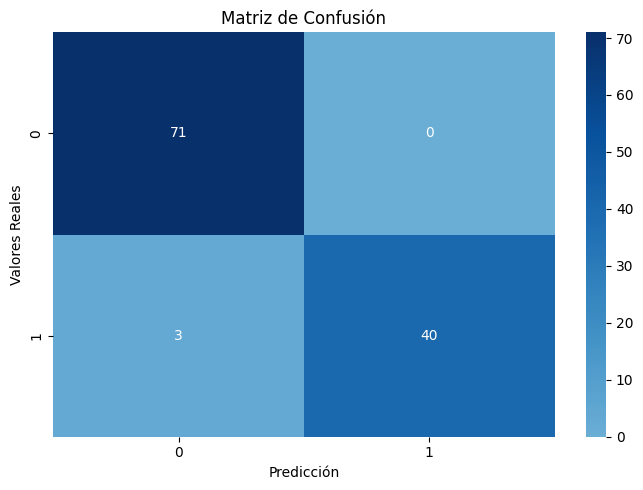

In [35]:
graph_confusion_matrixes([conf_matrix_nn,], figsize=(7, 5), column_num=1)

Graficamos la Varianza explicada acumulada por los componentes principales

## **Conclusión**

Rendimiento Actual

- Métricas clave:
Clase 0.0 (negativa):
- Precision: 0.97 → De todas las predicciones para la clase 0, el 97% son correctas.
- Recall: 1.00 → Se identificaron correctamente todas las instancias de la clase 0.
Clase 1.0 (positiva):
- Precision: 1.00 → Todas las predicciones de la clase 1 son correctas.
- Recall: 0.95 → Se omitieron 2 instancias de la clase 1, como lo muestra la matriz de confusión.

El modelo tiene un desempeño altamente efectivo, especialmente para la clase mayoritaria (0.0). Sin embargo:

- Clase 1.0 presenta ligeras dificultades al identificar algunos casos positivos.

Pequeños errores en clase 1:

Los 2 falsos negativos podrían ser críticos si la clase 1 tiene mayor importancia (por ejemplo, si representa casos de cáncer).

- Modelo básico:

El MLP básico puede no capturar toda la complejidad de los datos si las relaciones no lineales son más profundas.

El MLP básico ha mostrado un excelente rendimiento en este dataset con una precisión del 98%. Sin embargo, se puede mejorar aún más:

- Ajustando la arquitectura y los hiperparámetros.
- Balanceando los datos para reducir los falsos negativos en la clase 1.0.
- Evaluando la robustez con validación cruzada y técnicas de regularización.
- Si la clase 1.0 es crítica (como casos de cáncer), mejorar la capacidad de detección es prioritario.